# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Importando o dataframe e separando a variável resposta das variáveis explicativas
df = pd.read_csv('./encoded_demo.csv')
y = df['mau_True']
X = df.drop('mau_True', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
# Definindo o modelo
clf = DecisionTreeClassifier(random_state=100)

# Usando os dados separados para treinamento
clf = clf.fit(X_train,y_train)

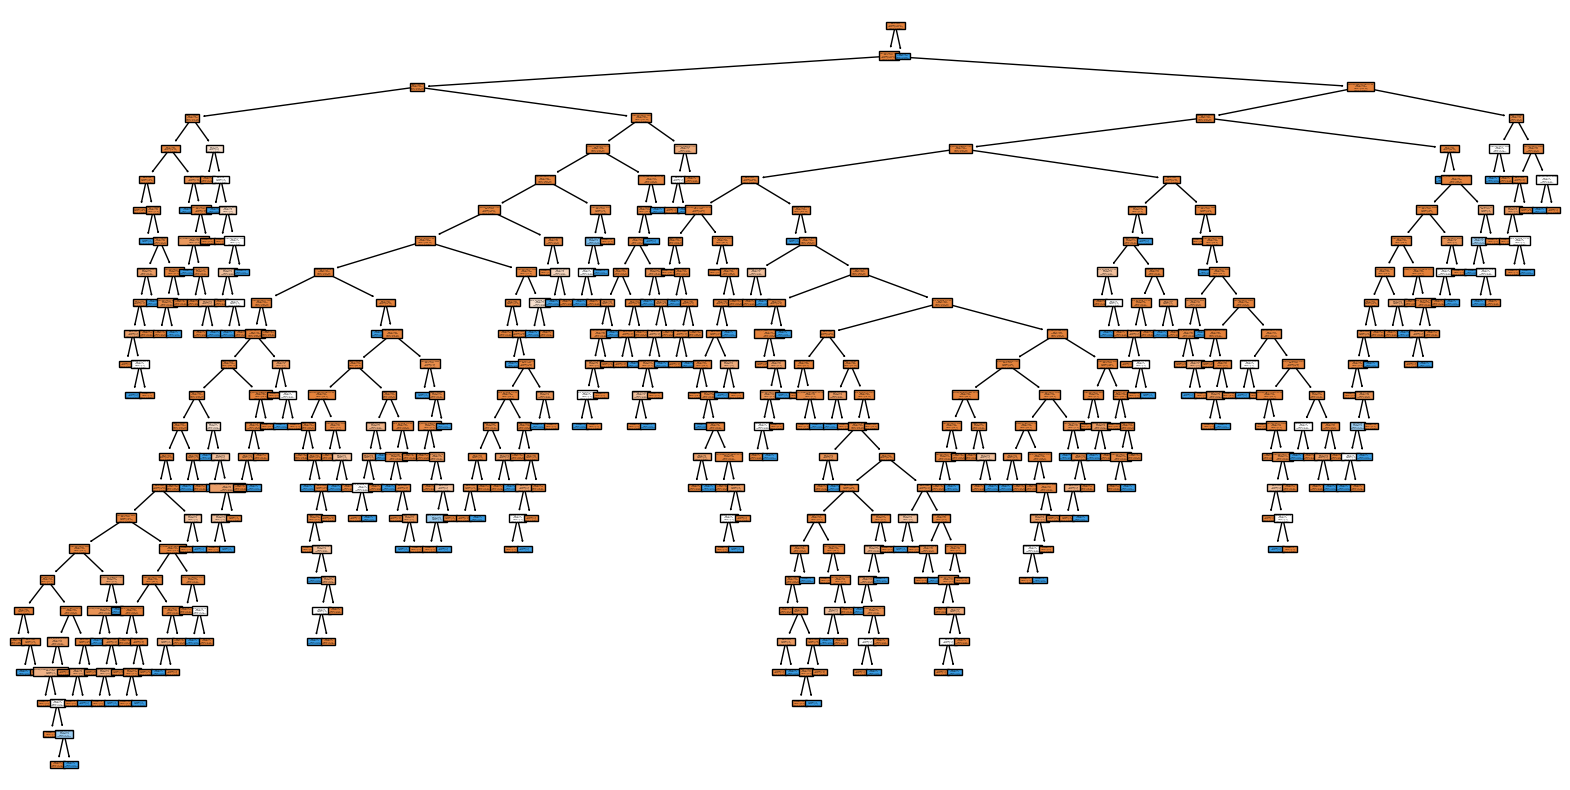

In [12]:
# Visualizando a árvore
plt.figure(figsize=(20,10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_train.columns);

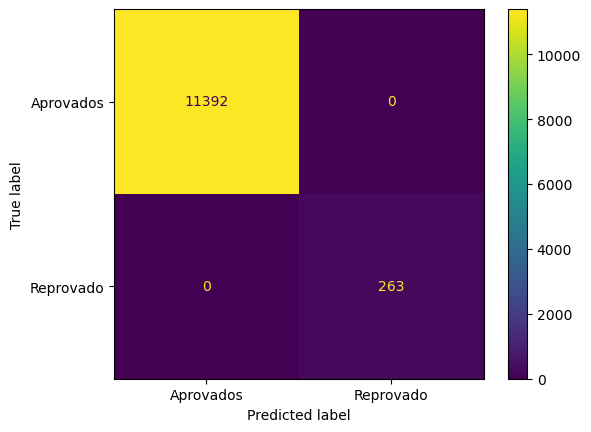

In [66]:
# Visualizando a matriz de confusão de treino
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovados','Reprovado']);

In [67]:
# Calculando a acurácia da base de treino
predict_X_train = clf.predict(X_train)
accuracy_score(y_train,predict_X_train )

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [68]:
# Usando os dados separados para teste

# Definindo o modelo
clf_teste = DecisionTreeClassifier(random_state=100)

clf_teste = clf_teste.fit(X_test,y_test)

In [70]:
y_chapeu_teste = clf.predict(X_test)

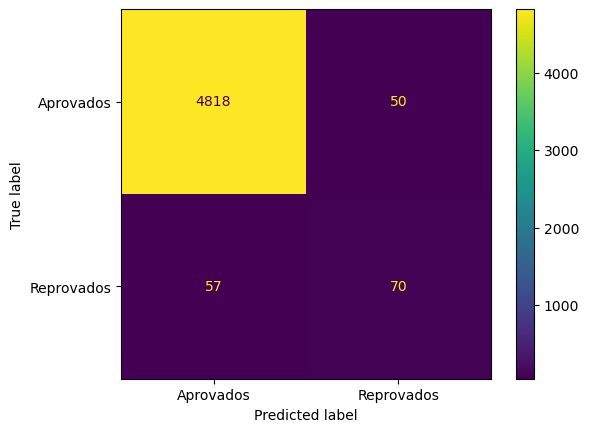

In [71]:
# Visualizando a matriz de confusão de teste
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovados','Reprovados']);

In [72]:
X_test.shape

(4995, 29)

In [74]:
# Calculando a acurácia da base de teste
accuracy_score(y_test, y_chapeu_teste)

0.9785785785785786

In [52]:
(4818 + 70) / 4995

0.9785785785785786

In [77]:
clf_teste_2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10 ,random_state=123)
clf_teste_2 = clf_teste_2.fit(X_test,y_test)

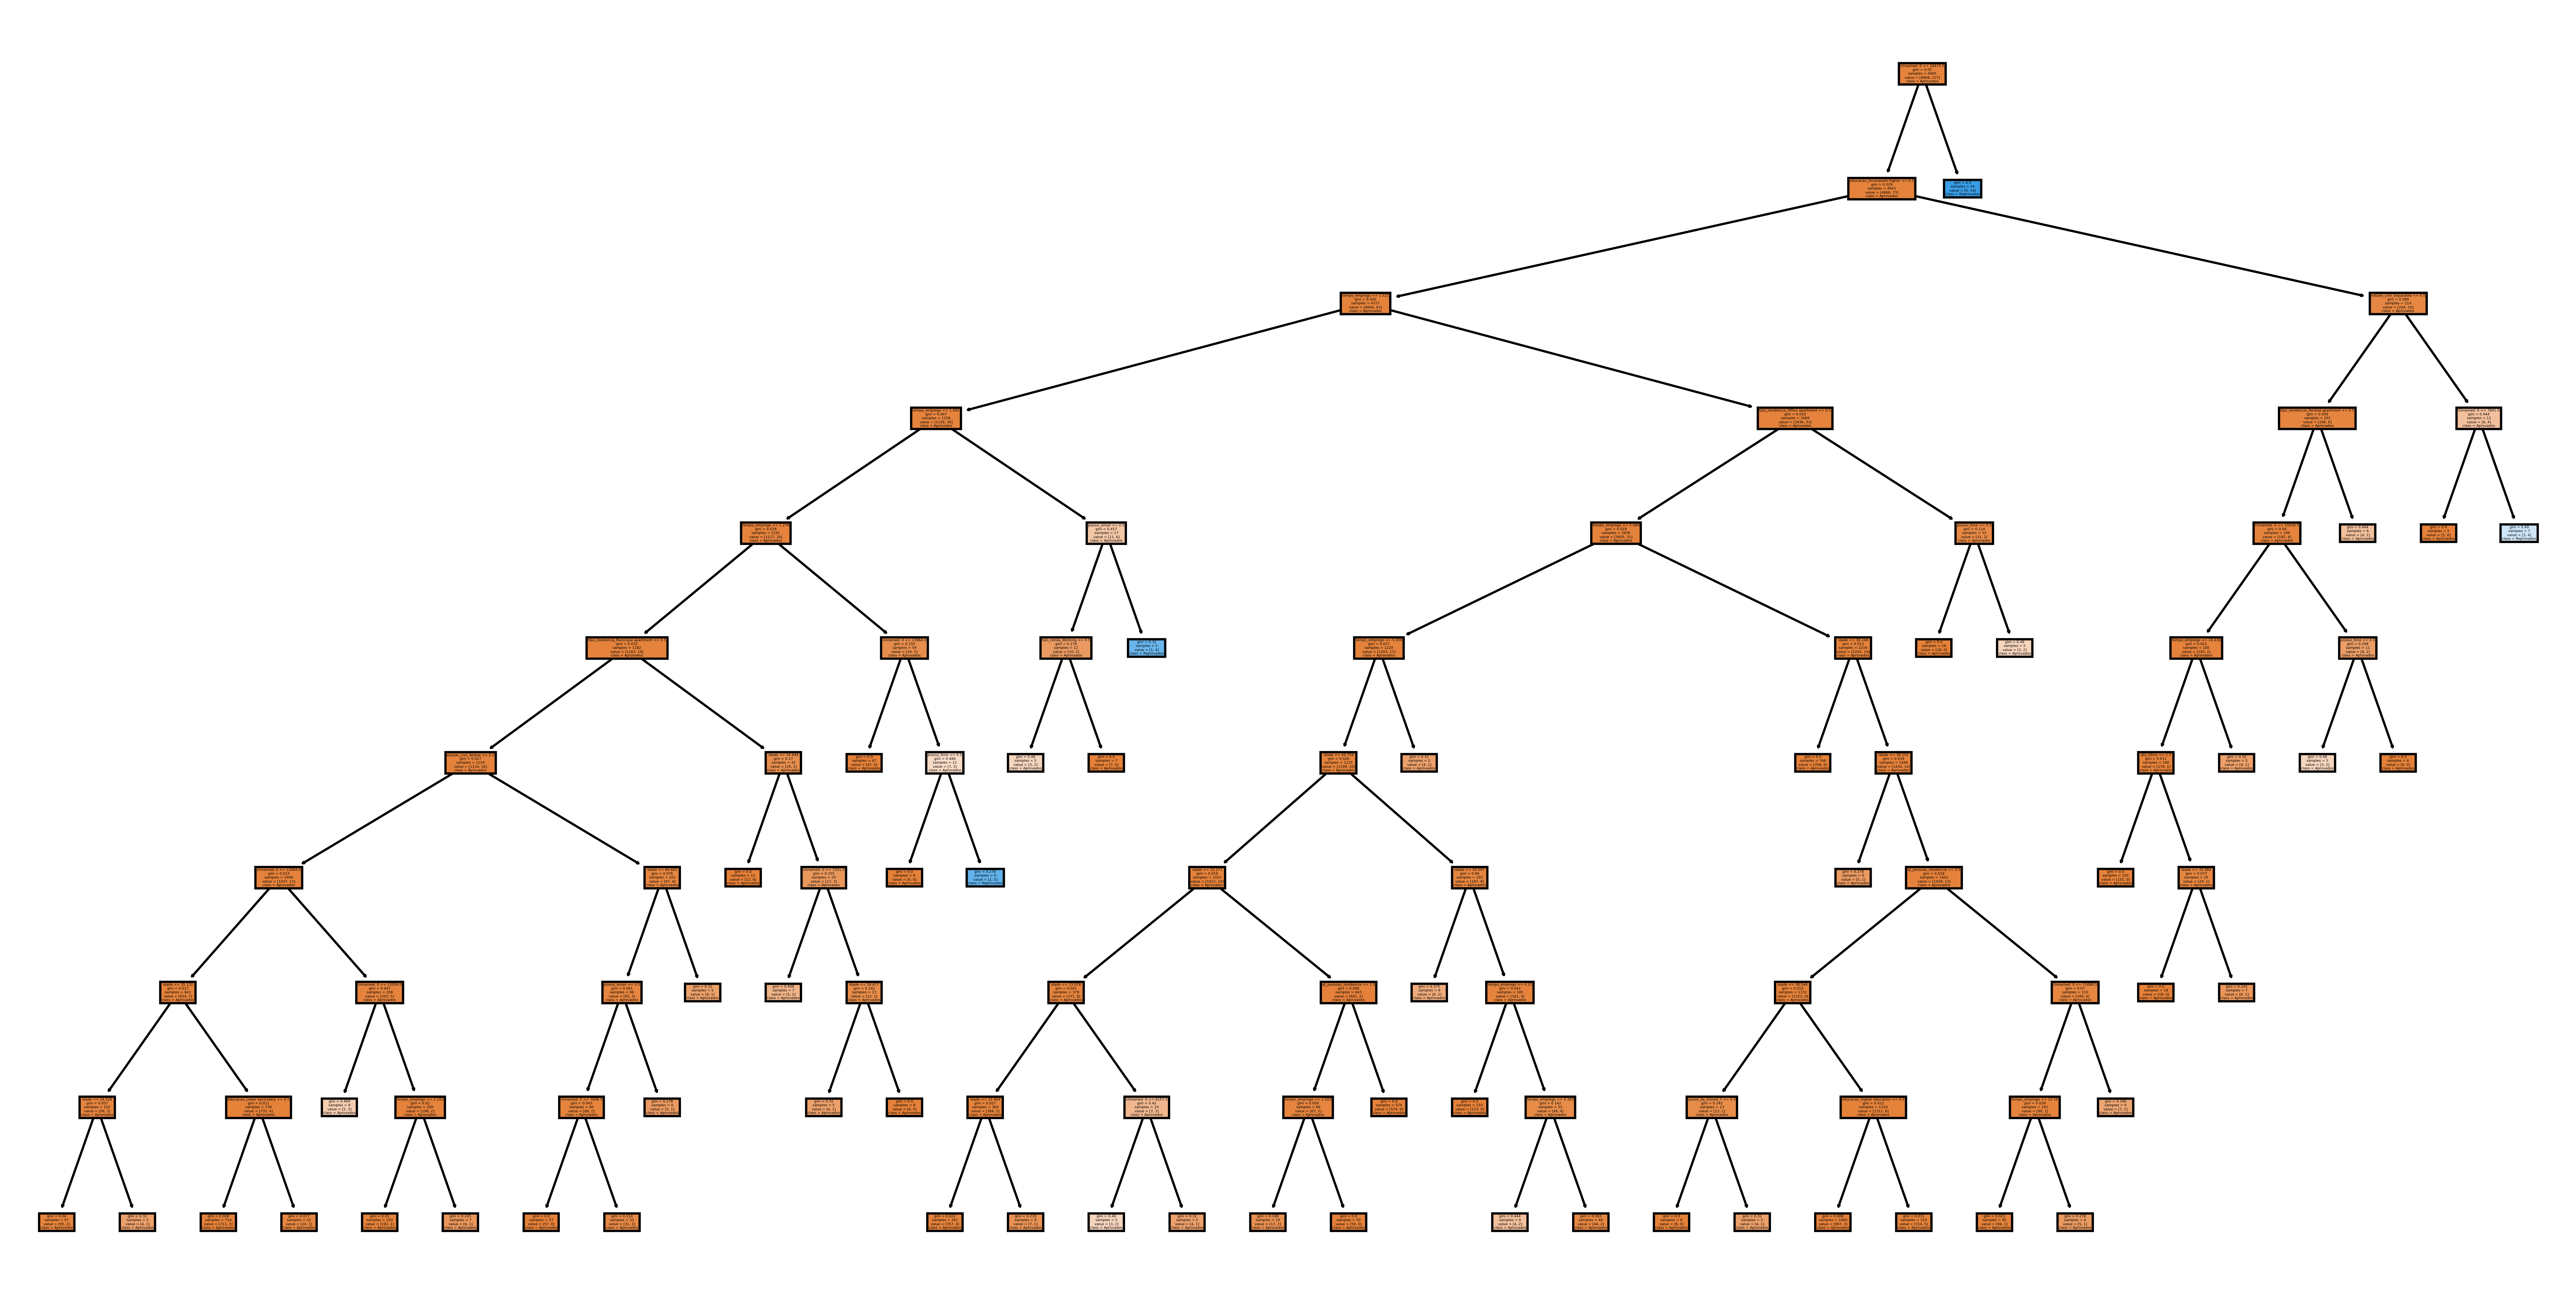

In [78]:
# Visualizando a árvore de teste 2
plt.figure(figsize=(20,10), dpi=600)
plot_tree(clf_teste_2,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X_test.columns);

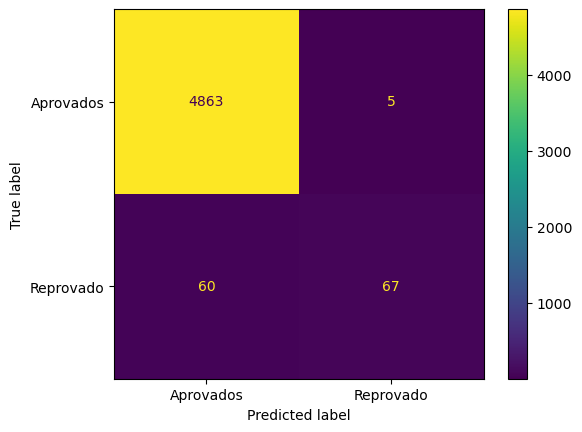

In [81]:
# Visualizando a matriz de confusão de teste 2 usando plot_confusion_matrix
plot_confusion_matrix(clf_teste_2, X_test, y_test, display_labels=['Aprovados','Reprovado']);

In [82]:
X_test.shape

(4995, 29)

In [87]:
predict = clf_teste_2.predict(X_test)
accuracy_score(y_test, predict)

0.986986986986987

In [88]:
# Proporção de proponentes classificados como maus
(54+4842) / 4995

0.9801801801801802

In [89]:
# Acurácia se todos os contratos fossem bons
y_bias_bom = y_test.replace({1:0})
clf_teste_3 = DecisionTreeClassifier(random_state=100)
clf_teste_3 = clf_teste_3.fit(X_test,y_bias_bom)

In [90]:
accuracy_score(y_bias_bom, clf_teste_3.predict(X_test))

1.0